# Machine learning project

**Content**

1. [Definition](#definition)
2. [Data Analysis](#data_analysis)
3. [Functions for data processing](#functions)
4. [Data visualisation and pre-processing](#visualization)
5. [Model creation and applying](#models)
6. [Conclusions](#conclusions)

## 1. Definition <a class='anchor' id='definition'>

### Overview

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data


Main goal of this contest was predict price of appartment based, on set of features which characterizes these appartments.

### Problem statement

In the current project price of appartment from test dataset is going to be predicted.
There are several models of different types will be created and then their results will be compared to found the most optimal model which fit best for Price prediction.

Price prognosos is the regression question and target variable has continiuous range of values. 
When counting parameters of existing appartments we are going to predict price for other appartments described by the same set of features.

Main goal: Find the model which will be able predict value of target variable for each new object.
Quality of prediction will be R2 score.

### Metrics

There are three metrics which can be used for regression tasks.

- Mean_absolute_error
- Mean Square Error
- R2_score

Quality of model will be verified based on R2 score which should be close to 1.0 as close as it is possible.

### Model selection

For the current tasks followinf models will be applied for comparing of results:
- Lienar Regression
- Random Forrest Regressor
- Gradient Boosting

### Modules import

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from random import randint

In [14]:
# garbage collector
import gc 

Creation of empty dataframe for result storing

In [15]:
result = pd.DataFrame(columns=['Model_type','data_proprocessing','R2_score', 'MAE', 'MSE'], dtype = object)

## 2. Data analysis <a class='anchor' id='data_analysis'>

### Data Preparation

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data

Id columns will be used as index because this field should be unique and does not any valueable information for prediction process.

In [16]:
df = pd.read_csv("D:\\Learning\\GeekBrains\\numpy and pandas\\Final project\\train.csv", index_col='Id' )

In [17]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Data fields/Features
- Id - id of appartment
- DistrictId - id of district where appartment is
- Rooms - number of rooms in apartment
- Square - area of appartment
- LifeSquare - value of life square of appartment
- KitchenSquare - value of kitchen square of appartment
- Floor - floor where appartment is.
- HouseFloor - number of floors of the house.
- HouseYear - year where house was built.
- Ecology_1, Ecology_2, Ecology_3 - ecological features of region
- Social_1, Social_2, Social_3 - social features of region
- Healthcare_1, Helthcare_2 - features of reagion related to healthcare
- Shops_1, Shops_2 - features which describe existiong of shops, trade centers etc nearby
- Price - target value. Price of appartment

In [18]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [19]:
df.shape

(10000, 19)

In [20]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


The most of fields have anomalies and outliers.

Distribution of target variable:

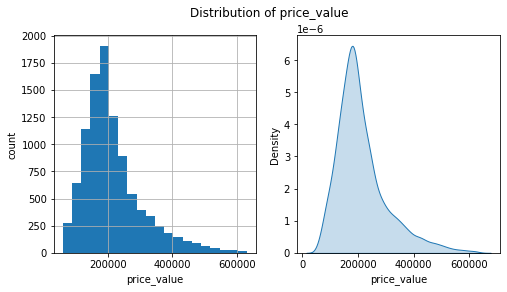

In [21]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price_value')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price_value')

plt.suptitle('Distribution of price_value')
plt.show()

In [22]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Dispersion of target variable is closed to normal, non-symmetrical. 

It looks like that changes or processing of target variable Price is not required.

### Columns with null data

In [23]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

'LifeSquare' and 'Healthcare_1' columns contains a lot of null data.

Training dataset contains 10000 entries.

So persent of missing data for 'LifeSquare' is 21.13 ad for Healthcare_1 is 47.98.

#### Columns with anomalies/outliers

In [24]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [25]:
df[(df['KitchenSquare'] > df['Square']) | (df['LifeSquare'] > df['Square'])].count()

DistrictId       486
Rooms            486
Square           486
LifeSquare       486
KitchenSquare    486
Floor            486
HouseFloor       486
HouseYear        486
Ecology_1        486
Ecology_2        486
Ecology_3        486
Social_1         486
Social_2         486
Social_3         486
Healthcare_1     170
Helthcare_2      486
Shops_1          486
Shops_2          486
Price            486
dtype: int64

Amount of columns where floor value exceeds general amount of floor.

In [26]:
df[df['Floor'] > df['HouseFloor']].count()

DistrictId       1825
Rooms            1825
Square           1825
LifeSquare       1210
KitchenSquare    1825
Floor            1825
HouseFloor       1825
HouseYear        1825
Ecology_1        1825
Ecology_2        1825
Ecology_3        1825
Social_1         1825
Social_2         1825
Social_3         1825
Healthcare_1      861
Helthcare_2      1825
Shops_1          1825
Shops_2          1825
Price            1825
dtype: int64

Data for cases above will be transformed in the next sections.

#### Categorial variables

The most part of columns contains numerical data, but three of them have object/category data type:
- Ecology_2 
- Ecology_3
- Shops_2 

During further processing object datatypes will be changed to their numerical equivalents.

In [27]:
df.select_dtypes(include=['object', 'category'])

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B
...,...,...,...
77,B,B,B
6159,B,B,A
5123,B,B,A


Changing of datatypes and converting of columns is not required.

## 3. Functions for data processing <a class='anchor' id='functions'>

This section contains functions which can be used in next sections to simplify performing of some operations.

In [28]:
    def reduce_mem_usage(df):
        """ iterate through all the columns of a dataframe and modify the data type
            to reduce memory usage.        
        """
        start_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
        for col in df.columns:
            col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

        end_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
        return df    

In [29]:
def evaluate_preds(true_values, pred_values, save=False):
    """Evaluation of model quality preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mean_squared_error(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mean_squared_error(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # line where true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [30]:
# function is need to dataset processing and clearing of data
def data_clearing (dfr):
    # median values for dataframes. Median values will be used for data preprocessing and gaps filling.
    # all changes for dataframe in this function were made according to feature analysis in section 4
    #ls_median = dfr['LifeSquare'].median()
    yr_median = dfr['HouseYear'].median()
    #house_floor_median = dfr['HouseFloor'].median()
    kc_median = dfr['KitchenSquare'].median()
    rm_median = dfr['Rooms'].median()

    # Rooms
    dfr.loc[dfr['Rooms'] < 1, 'Rooms'] = 1
    dfr.loc[dfr['Rooms'] >= 6, 'Rooms'] = rm_median
    
    
    #Kitchen square
    dfr.loc[dfr['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    dfr.loc[dfr['KitchenSquare'] > 100, 'KitchenSquare'] = kc_median
    dfr.loc[dfr['KitchenSquare'] > dfr['Square'], 'KitchenSquare'] = 3
    
    #House Floor
    #hf_median
    dfr.loc[dfr['HouseFloor']==0, 'HouseFloor'] = dfr['Floor']
    dfr.loc[(dfr['Floor'] > dfr['HouseFloor']), 'HouseFloor'] = dfr['HouseFloor']   
    
    #House Year
    dfr.loc[dfr['HouseYear'] > 2021, 'HouseYear'] = yr_median
    
    #Healthcare_1
    #if 'Healthcare_1' in dfr.columns:
    #    dfr = dfr.drop('Healthcare_1', axis = 1)
    dfr = dfr.fillna(df['Healthcare_1'].median())
    
    #LifeSquare
    comparing_condition = ((dfr['LifeSquare'].isnull()) | (dfr['LifeSquare'] > (dfr['Square'] - dfr['KitchenSquare'])))
    dfr.loc[comparing_condition, 'LifeSquare'] = \
    dfr.loc[comparing_condition, 'Square'] - dfr.loc[comparing_condition, 'KitchenSquare'] - 2
    # 2 
            
    #Removing all auxiliary columns from dataset
    if 'square_difference' in dfr.columns:
        dfr = dfr.drop('square_difference', axis = 1)
    if 'avg_room_square' in dfr.columns:
        dfr = dfr.drop('avg_room_square', axis = 1)
    if 'gen_square_kitchen' in dfr.columns:
        dfr = dfr.drop('gen_square_kitchen', axis = 1)
    
    return dfr

## 4. Data visualisation and pre-processing <a class='anchor' id='visualization'>

Visualisation:
- Histograms for numeric variables distribution
- Boxplots before and after pre-processing
- Distribution of categorial variables.

Preprocessing:

1. remove columns with lack of data
2. Change NaN to appropriate group median values
3. Change categorial features to numerical
4. Normalization of data (optional)
5. regularization of data (optional)

Creattion of copy of initial dataset for preprocessing.

In [31]:
df_fill = df.copy()

In [32]:
df_target = 'Price'

In [33]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Distribution of numeric variables:

In [34]:
df_num_features = df_fill.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Price               0
dtype: int64

In [35]:
df_num_features = df_num_features.drop('Price', axis = 1)


Selecting of numerical features and check their distribution.

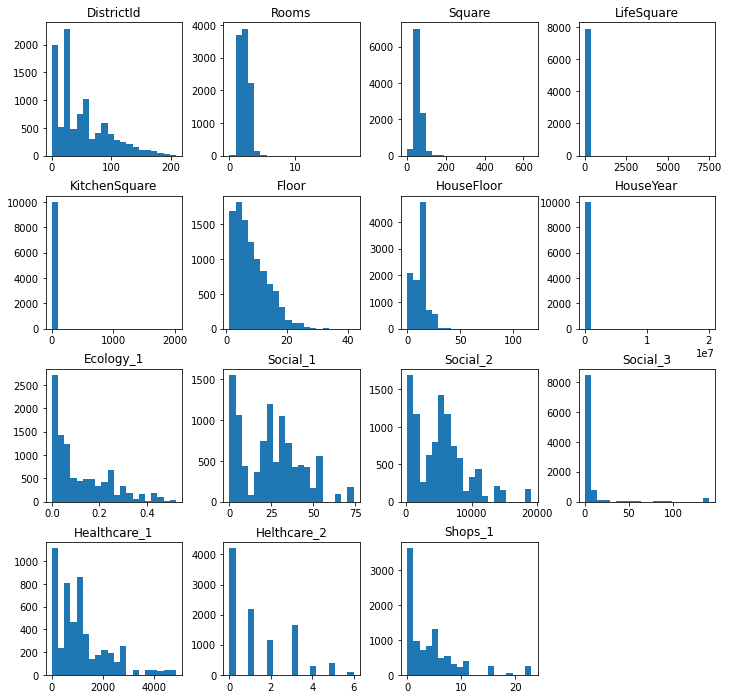

In [36]:
df_num_features.hist(figsize=(12,12), bins=20, grid=False);

### Processing of features

In this section some features will be transformed to remove anomalies and outliers

Adding of new temporary features for analyze outliers.

Temporary columns. Will be deleted after completing of preprocessing.

In [37]:
del df_num_features

In [38]:
# Average square per room in each appartment
df_fill['avg_room_square'] = (df_fill['Square']/df_fill['Rooms']).astype('float32')

In [39]:
# Ratio between kitchen square and square
df_fill['gen_square_kitchen'] = (df_fill['KitchenSquare']/df_fill['Square']).astype('float32')

In [40]:
# difference between general square and other mentioned squares
df_fill['square_difference'] = (df_fill['Square'] - df_fill['KitchenSquare'] - df_fill['LifeSquare']).round(decimals = 0)

In the rows below each feature will be processed individually and regarding of result analyze optimal way for feature processing will be chosen.

**Rooms**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


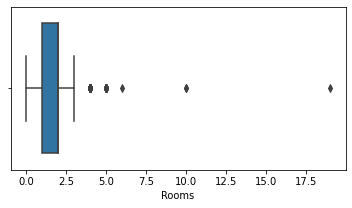

In [41]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Rooms'])
plt.xlabel('Rooms')
plt.show()

In [42]:
df_fill['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [43]:
df_fill['Rooms'].value_counts().sort_values()

6.0        1
19.0       1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

All appartmets where rooms have zero value will be changed to 1

In [44]:
df_fill[(df_fill['Rooms'] > 6)][['Rooms', 'avg_room_square']]

,Rooms,avg_room_square
Id,,
5927,10.0,5.905697
8491,19.0,2.210845
14865,10.0,6.087127


Resolving of outliers cases:
   - All values which are less than 1 will be converted to 1.0
   - All values which are greater or equal to six will be converted to median value. 

**Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


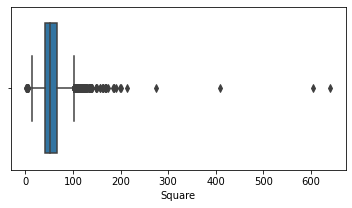

In [45]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Square'])
plt.xlabel('Square')
plt.show()

Square column will be left without changes

**Life square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


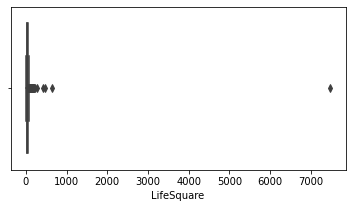

In [46]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [47]:
df_fill['LifeSquare'].isnull().sum()

2113

In [48]:
df_fill[df_fill['LifeSquare'] > df_fill['Square']]['LifeSquare'].count()

482

In [49]:
df_fill[df_fill['LifeSquare'] == 0]['LifeSquare'].count()

0

Resolving of outliers:
- if LifeSquare is NaN or LifeSquare > Square, then LifeSquare will be changed to difference between Square and KitchenSquare and median difference between these differences.

**Kitchen Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


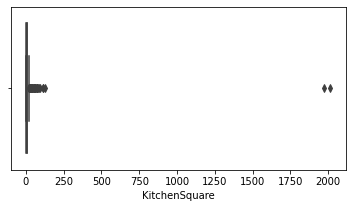

In [50]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.show()

In [51]:
# df_fill['KitchenSquare'].value_counts().sort_values()
df_fill['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [52]:
df_fill[(df['KitchenSquare'] > 80)]['KitchenSquare'].count()

7

In [53]:
df_fill[(df['KitchenSquare'] > df_fill['LifeSquare'])]['KitchenSquare'].count()

23

Resolving of outliers:
- If Kitchen square > 100 it will be converted to median value
- If Kitchen square < 3 it will be converted to 3
- if Kitchen square > general square it will be converted to 3

**Floor and house floor**

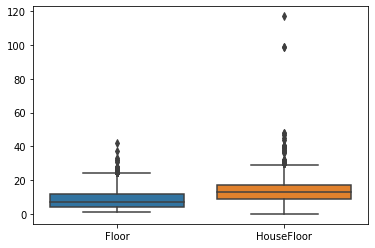

In [54]:
ax = sns.boxplot(data = df_fill[['Floor', 'HouseFloor']]                )
plt.show()

In [55]:
df_fill[df_fill['Floor'] == 0]['Floor'].count()

0

In [56]:
df_fill[df_fill['HouseFloor'] == 0]['HouseFloor'].count()

269

In [57]:
df_fill[(df_fill['HouseFloor'] < df_fill['Floor']) ]['Floor'].count()

1825

Resolvong of outliers:
- if HouseFloor == 0, value will be changed to Floor (or to median value of whole dataset - optional to be compared with result sxore)
- if Floor > HouseFloor, value will be changed to HouseFloor

**HouseYear**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


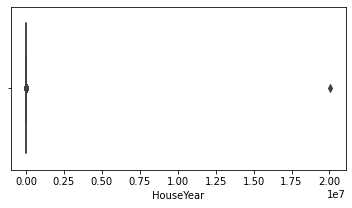

In [58]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['HouseYear'])
plt.xlabel('HouseYear')
plt.show()

In [59]:
df_fill[df_fill['HouseYear'] == 0]['HouseYear'].count()

0

In [60]:
df_fill[df_fill['HouseYear'] < 1900]['HouseYear'].count()

0

In [61]:
df_fill[df_fill['HouseYear'] > 2021]['HouseYear'].count()

2

Resolvong of outliers:
- if year > 2021 it will be changed to median year

**Healthcare_1**

Due to big amount of NaN values in Healthcare_1 column, it should be dropped

### Applying of data clearing

Function from section 3 will be applied to test dataset

In [62]:
df_fill.shape

(10000, 22)

In [63]:
df_fill = data_clearing (df_fill)

In [64]:
df_fill.shape

(10000, 19)

In [65]:
df_fill.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.887600,56.315775,39.267365,6.52960,8.526700,12.852200,1984.863800,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.811438,21.058732,21.124402,4.00149,5.241148,6.536821,18.409979,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,1.000000,1.136859,-3.863141,3.00000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,24.882906,3.00000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,35.029360,6.00000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,48.256785,9.00000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,5.000000,641.065193,629.065193,96.00000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Save dataframe to pickle file.

In [66]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

In [ ]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

### Processing of categorial variables

There are three categorial columns in the dataset:
- Ecology_2
- Ecology_3
- Shops_2

Each columns can have ony one of two values and do not contain any null values.

In [67]:
df_cat_features = df_fill.select_dtypes(include=['object', 'category'])

In [68]:
df_cat_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [69]:
df_cat_features['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [70]:
df_cat_features['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [71]:
df_cat_features['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [ ]:
fig, ax =plt.subplots(1,3)
fig.subplots_adjust(wspace=0.7, hspace=0.7)
sns.countplot(y = 'Ecology_2',data = df_cat_features, ax=ax[0])
sns.countplot(y = 'Ecology_3',data = df_cat_features, ax=ax[1])
sns.countplot(y = 'Shops_2',data = df_cat_features, ax=ax[2])
fig.show()

In [ ]:
df_cat_features['Ecology_2'].value_counts()

Categorial values will b converted to numerical using get_dummies metgod.

As a result of applying this method new columns in the dataset will be added.

In [72]:
df_fill = pd.get_dummies(df_fill, columns = df_cat_features.columns)

In [73]:
df_fill.shape

(10000, 22)

In [74]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,33,...,900.0,0,11,184966.930730,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,46,...,240.0,1,16,300009.450063,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968.0,0.049637,34,...,229.0,1,3,220925.908524,0,1,0,1,0,1
5809,58,2.0,53.352981,42.352981,9.0,8,17.0,1977.0,0.437885,23,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,35,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [75]:
df_fill.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear        float64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

### Processing of District ID

In [76]:
df_fill['DistrictId'].unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [ ]:
df_fill['DistrictId'].isnull().sum()

Case 1. Dropping of District ID

In [ ]:
#df_fill = df_fill.drop(['DistrictId'], axis = 1)

In [ ]:
#df_fill.shape

Saving of updated dataset to pickle file

Case 2. Left data as is. *Accepted for further processing for now.*

Case 3. Transforming of District ID to more valuable data. e.g. to coefficient which related to apartment price.

In [ ]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

# 5. Model creation and applying <a class='anchor' id='models'>

## Algorithms and Techniques

There are a lot of algorythms for solving of regression tasks:
   - linear regression
   - polynominal regression
   - Decision Tree Regressor
   - Random Forest Regressor
   - Gradient Boosting etc
**Linear regression**
One of the simplest algorythms. Sometimes it even is not counted as ML method.
Simpliest formula is:
Y = kx + b
and goal of algorithm is to find weights k and shift b to satisfy the best selected metric value.
Implementation of linear regression is based on appropriate module from sklearn.

**Decision Tree Regression**
This is more flexible and easiy to understand method. It allows to have results which more fit curve of target variable.


**Random Forest Regression**
Method based on Decision Tree method but it use relatively big amount of Decision Trees. They works with different set of features in different combinations. 
Selecting of value for target variable is performed via voting of different trees from ensemble.

**Gradient Boosting**
Method which is based on boosting - method of ensembles building where predictors are built consistently, not in paralleal like in RandomForest. Boosting uses idea that every next model will be learnt based on errors of previous model.


To split initial dataset for training and test datasets train_test_split from sklearn can be used.

For best supervised method selection following methods of price prediction will be applied:
1. Liear regression
2. Random Forest 
3. Gradient Boosting

After processing of all methods the best variant will be selected.

To determine of quality of model, following metrics will be used:
- R2 score
- mean absolute error
- mean squared error

### Metrics

    
ML metric - Mean Squared Error (**MSE**) 
    - MSE in direct ratio to RMSE и R^2
    - MSE  easy to optimize (take the derrivatives)   



Business metric - **R^2**, Root Mean Squared Error (**RMSE**)
    - Easy interpretable
    - easy to understand for business
    - R^2 can have velues from 0 to 1, if 1, all our predictions are ideal. It possible to say that r2 score describy accuracy of our model.

The best model will have max value of R2MSE for testdataset. 

 $$MSE = \frac{1}{n}  \sum{(y - y_{pred})^2}$$

$$RMSE = \sqrt{\frac{1}{n}  \sum{(y - y_{pred})^2}}$$

$$R^2 = 1 - \frac{\frac{1}{n}\sum{(y - y_{pred})^2}}{\frac{1}{n}\sum{(y - y_{mean})^2}}$$

Dataset for each model will be processed by following steps:
1. additional preprocessing which can be needed for this particular model
2. spliting training and testing 
3. perform machine learning and record training and testing scores

## 5.1 Linear Model

Linear model will be used as the simplest avialble model for result comparing.
Linear model is senitive to


For linear model normalized values will be applied due to senctivity of this model to differen scale of values.

In [77]:
X_lr = df_fill.copy()

In [78]:
X_lr.shape

(10000, 22)

In [79]:
X_lr.head(1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.08904,33,...,900.0,0,11,184966.93073,0,1,0,1,0,1


Some features will be removed because their corellatia coefficient is 0

Categorial variables also will be removed.

In [80]:
#X_lr = X_lr.drop(['LifeSquare', 'KitchenSquare', 'HouseFloor', 'HouseYear', 'Healthcare_1', \
#                              'Ecology_2', 'Ecology_3', 'Shops_2'], axis = 1)
X_lr = X_lr.drop(['Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B'], axis = 1)

In [81]:
y_lr = X_lr['Price']

In [82]:
X_lr = X_lr.drop(['Price'], axis = 1)

In [83]:
num_feature_names = X_lr.columns 
index_col = X_lr.index

In [84]:
X_lr.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
Id,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,33,7976,5,900.0,0,11
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,46,10309,1,240.0,1,16
4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968.0,0.049637,34,7759,0,229.0,1,3
5809,58,2.0,53.352981,42.352981,9.0,8,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4


**Normalization od data using Standard Sacaler**
Linear model is very sensetive to different vallue sacale, so build correct form of correlation dependency all features have to be in the same scale.

In [85]:
X_lr.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
dtype: int64

Normalizing of data using Standard Scaler which changes data to their projection to the [-1; 1] interval.

Numerical features only will be processed.

In [86]:
scaler = StandardScaler()
scaler_lr = scaler.fit_transform(X_lr)

X_lr = pd.DataFrame(scaler_lr, columns=num_feature_names)
X_lr.set_index(index_col, inplace = True)

Building correlation matrix which will display dependencies of target variable by  other features.

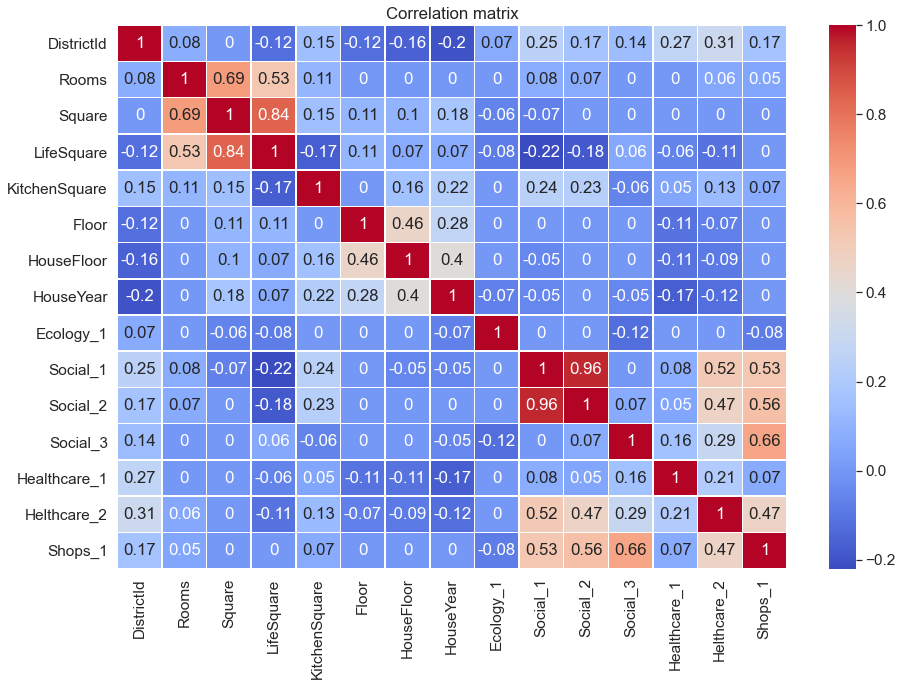

In [87]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X_lr[num_feature_names].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.05] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Values which have the hights coefficient of correlatio is Rooms and Square.

Social_1, Social_2 and Healthcare also heve correlation coefficient grater than 0.2.
Values with low correelation coefficient will be romeved from the dataset

In [88]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state = 43)

In [89]:
lr = LinearRegression()

In [90]:
X_train_lr.head(1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
Id,,,,,,,,,,,,,,,
6498,0.151408,0.138526,0.278368,-0.211745,0.86732,0.853539,1.399496,0.985178,-0.235747,2.812784,3.427056,-0.253421,-0.16924,2.464303,2.240632


R2:	0.507
RMSE:	65156.023
MSE:	4245307318.573


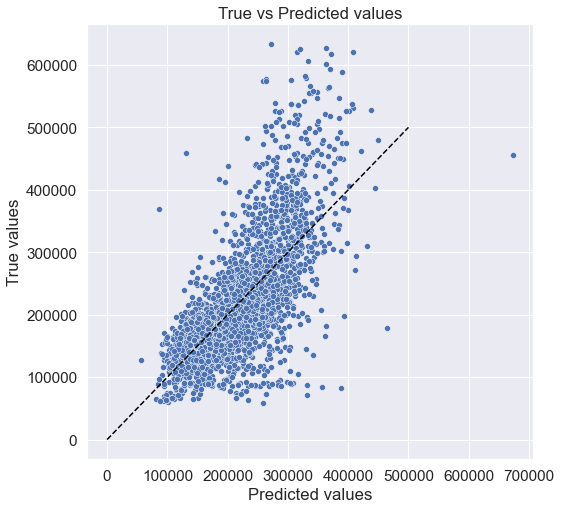

In [91]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

y_pred_lr = lr_model.predict(X_test_lr)
# Постпроцессинг
# y_pred = np.clip(y_train_preds, a_min=10000, a_max=500000)

evaluate_preds(y_test_lr, y_pred_lr)

**Evaluating of algorythm**

In [92]:
lr_mean_r2 = r2_score(y_test_lr, y_pred_lr)
lr_mean_r2

0.506954101990563

In [93]:
lr_mean_sq_error = mean_squared_error(y_test_lr, y_pred_lr)
lr_mean_sq_error

4245307318.5725756

In [94]:
lr_mean_abs_error = mean_absolute_error(y_test_lr, y_pred_lr)
lr_mean_abs_error

44874.53896456897

In [95]:
df_res = pd.DataFrame([['Linear regression','Yes',lr_mean_r2,lr_mean_abs_error,lr_mean_sq_error]], columns = result.columns)
result = result.append(df_res)

**Conclusion about linear model**

As expected linear model in this task displayed relatively low r2 score.

### Random Forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [96]:
X_rf = df_fill.copy()

In [97]:
y_rf = X_rf['Price']

In [98]:
X_rf = X_rf.drop('Price', axis = 1)

In [99]:
X_rf.shape

(10000, 21)

In [100]:
X_rf.head(1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.08904,33,...,5,900.0,0,11,0,1,0,1,0,1


In [101]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state = 42)

There are several approaches available for data processing:
1. Delete all categorial fields, fields which do not affect result and fields with big amount of null values
2. Use data processing by different rules. See above.


**Approach 1.** Delete all categorial fields and fields with gaps in data.

Selecting of params for model fit

In [102]:

params = {'n_estimators':range(500, 1100, 100), 
          'max_depth':range(10, 21, 2),
         }

In [103]:
rf_model = RandomForestRegressor(criterion='mse', random_state=42)

Some parameters for random forest model, like quality metrics will be same, they will be left beyond metha-parametrs fit.
Selecting of parameters will be perfomed using GridSearchCV from sklearn

**Optimization of parameters for Random Forest model**

In [104]:
gsr = GridSearchCV(rf_model, params, 
                  scoring='r2', # selected metric for model estimation 
                  cv=KFold(n_splits=5,   #amount of folds in cross-validation
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )

In [105]:
%%time
gsr.fit(X_train_rf, y_train_rf) 

Wall time: 25min 4s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 21, 2),
                         'n_estimators': range(500, 1100, 100)},
             scoring='r2')

**Random Forest metaparameters which was determined as the best**

In [106]:
res = pd.DataFrame(gsr.cv_results_)
res.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.917982,1.650909,0.162367,0.022278,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.714368,0.715265,0.719707,0.681292,0.755552,0.717237,0.023573,36
1,17.948932,0.608827,0.159772,0.006225,10,600,"{'max_depth': 10, 'n_estimators': 600}",0.714778,0.715556,0.719725,0.681538,0.756145,0.717548,0.023676,33


In [107]:
gsr.best_params_

{'max_depth': 16, 'n_estimators': 1000}

According to grid search beast params are: {'max_depth': 15, 'n_estimators': 1000}

In [108]:
gsr.best_score_

0.7239538628839103

In [109]:
best_rf_model = gsr.best_estimator_

**Applying of selected model to training dataset**

In [110]:
best_rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=42)

In [111]:
y_pred_rf = best_rf_model.predict(X_train_rf)

**Calculation of metrics for train dataset**

In [112]:
mean_squared_error(y_train_rf, y_pred_rf)

452756178.4370081

In [113]:
mean_absolute_error(y_train_rf, y_pred_rf)

13708.946543006927

In [114]:
r2_score(y_train_rf, y_pred_rf)

0.94755994080614

**Prediction for test dataset**

In [115]:
y_pred_rf_test = best_rf_model.predict(X_test_rf)

In [116]:
rf_mean_sq_error = mean_squared_error(y_test_rf, y_pred_rf_test)
rf_mean_sq_error

2406304678.9855747

In [117]:
rf_mean_abs_error = mean_absolute_error(y_test_rf, y_pred_rf_test)
rf_mean_abs_error

28464.944748774647

In [118]:
rf_mean_r2 = r2_score(y_test_rf, y_pred_rf_test)
rf_mean_r2

0.7202542180221543

In [119]:
df_res = pd.DataFrame([['Random  Forest','Yes',rf_mean_r2,rf_mean_abs_error,rf_mean_sq_error]], columns = result.columns)
result = result.append(df_res)

R2:	0.72
RMSE:	49054.1
MSE:	2406304678.986


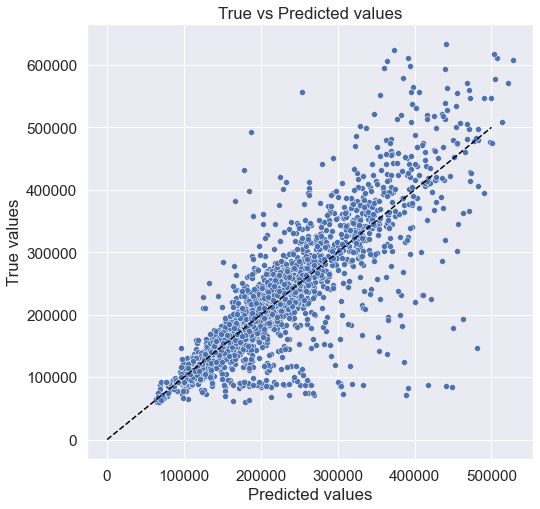

In [120]:
evaluate_preds(y_test_rf, y_pred_rf_test)

In [121]:
best_rf_model.feature_importances_

array([4.94045892e-02, 7.01993882e-02, 3.99268071e-01, 3.76553299e-02,
       2.10439507e-02, 2.69192134e-02, 2.06982026e-02, 3.37193212e-02,
       4.08565462e-02, 9.26174590e-02, 1.02650667e-01, 5.78953526e-02,
       2.23936753e-02, 5.95209937e-03, 1.64479291e-02, 2.41563977e-04,
       3.25219004e-04, 3.69924684e-04, 4.20641132e-04, 4.62726306e-04,
       4.58129674e-04])

**Feature Importances for test dataset**

In [122]:
feature_importances_df = pd.DataFrame(zip(X_train_rf.columns, 
                                       best_rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

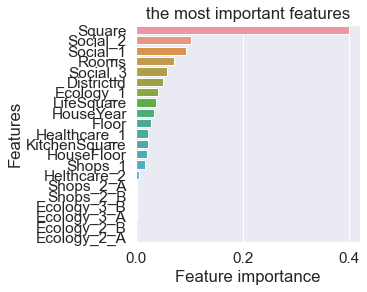

In [123]:
f, ax = plt.subplots(figsize=(4, 4))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title("the most important features")
plt.show()

Model validation

In [124]:
df_real_rf = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

**Applying changes to validation model**

In [125]:
X_rl_rf = pd.get_dummies(df_real_rf)

In [126]:
X_test_rf.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [127]:
#X_rl_rf = df_real_rf.drop(['DistrictId'], axis = 1)

In [128]:
X_rl_rf = data_clearing(X_rl_rf)

In [129]:
X_rl_rf.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [130]:
X_rl_rf = pd.get_dummies(X_rl_rf)

In [131]:
y_pred_rl_rf = best_rf_model.predict(X_rl_rf)

In [132]:
res_rl_rf = pd.Series(y_pred_rl_rf)

In [133]:
submission_rl_rf = X_rl_rf.index

In [134]:
frame_rl_rf = {'Id':submission_rl_rf, 'Price': res_rl_rf}

In [135]:
submission_result_rl_rf = pd.DataFrame(frame_rl_rf)

In [136]:
submission_result_rl_rf.shape

(5000, 2)

In [137]:
submission_result_rl_rf.to_csv('result.csv', index = False)

**Conclusion about random forest model:**

Random forest significantly increases prediction value relatively Linear model.  

## Gradient Boosting

Gradient boosting model applying

In [208]:
X_gb = df_fill.copy()

In [209]:
X_gb.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,33,...,900.0,0,11,184966.930730,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,46,...,240.0,1,16,300009.450063,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968.0,0.049637,34,...,229.0,1,3,220925.908524,0,1,0,1,0,1
5809,58,2.0,53.352981,42.352981,9.0,8,17.0,1977.0,0.437885,23,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,35,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


**Dataset preprocessing.**

For validation dataset preprocessign same data will be used as for training datasets.

In [210]:
X_gb = data_clearing(X_gb)

In [211]:
y_gb = X_gb['Price']

In [212]:
X_gb = X_gb.drop(['Price'], axis = 1)

Splitting training dataset to train and test sub datasets.

In [213]:
X_gb = X_gb.drop('DistrictId', axis = 1)

Based on experience of work with current dataset, some features can be deleted.

In [214]:
X_gb = X_gb.drop(['Ecology_2_A','Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'], axis = 1)

Splitting of dataset to training and test.

In [215]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.3, random_state = 44)

**Selecting of optimal parameters for dataset.**

In [216]:
gb_model = GradientBoostingRegressor(criterion='mse',
                          # min_samples_leaf=10,
                          random_state=44,
                         # n_estimators=100,
                         # max_depth=7
                         )

params = {'n_estimators': range(200, 701, 100), 
          'max_depth': range(2, 10, 2),
         #'min_samples_leaf':[20, 30, 40]                   
         }

In [217]:
params = {'n_estimators': range(100, 701, 50), 
          'max_depth': range(2, 11, 2)
         #'min_samples_leaf':[20, 30, 40]                   
         }

Applying of gread search to selecting of the most optimal set of meth-parameters.

In [218]:
gs = GridSearchCV(gb_model, params, 
                  scoring='r2', # r2 score metric 
                  cv=KFold(n_splits=5,   # k number of fold in cross validation
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )

In [219]:
%%time
gs.fit(X_train_gb, y_train_gb)

Wall time: 14min 36s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='mse',
                                                 random_state=44),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 11, 2),
                         'n_estimators': range(100, 701, 50)},
             scoring='r2')

In [220]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 100}

Best params are {'max_depth': 6, 'n_estimators': 200}

In [221]:
gs.best_score_

0.7328024314478053

In [225]:
best_gb_model = gs.best_estimator_

In [226]:
y_pred_gb = best_gb_model.predict(X_test_gb)
# evaluate_preds(y_train, y_train_preds)

**Selected model evaluation**

R2:	0.746
RMSE:	46817.475
MSE:	2191875939.35


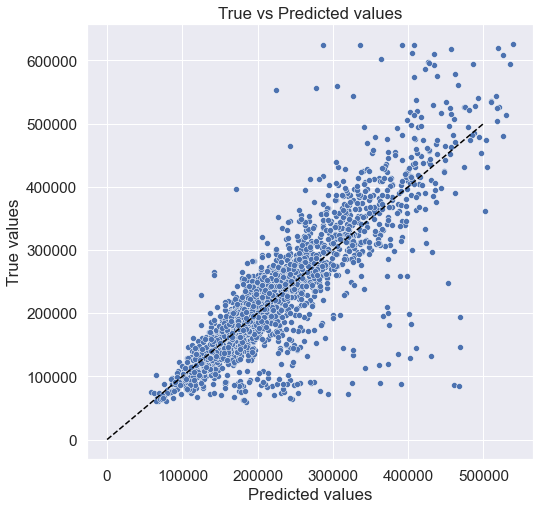

In [227]:
evaluate_preds(np.squeeze(y_test_gb.values), y_pred_gb)

In [228]:
best_gb_model.feature_importances_

array([0.06822203, 0.41798535, 0.02830428, 0.02560445, 0.02346733,
       0.0197006 , 0.03797918, 0.04327349, 0.07623791, 0.13617133,
       0.0748074 , 0.02550353, 0.00619535, 0.01654776])

In [229]:
feature_importances_df = pd.DataFrame(zip(X_train_gb.columns, 
                                       best_gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

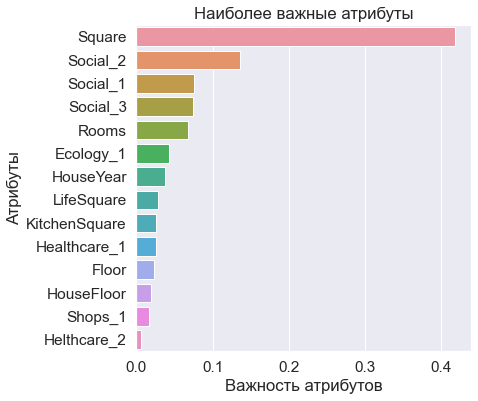

In [230]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [231]:
gb_mean_sqe_error = mean_squared_error(y_pred_gb, y_test_gb)
gb_mean_sqe_error

2191875939.3495502

In [232]:
gb_mean_abs_error = mean_absolute_error(y_pred_gb, y_test_gb)
gb_mean_abs_error

27696.02433460185

In [233]:
gb_r2_score = r2_score(y_pred_gb, y_test_gb)
gb_r2_score

0.6558184216917462

In [234]:
df_res = pd.DataFrame([['Gradient Boosting','Yes',gb_r2_score,gb_mean_abs_error,gb_mean_sqe_error]], columns = result.columns)
result = result.append(df_res)

**Validate data  on validation model**

In [235]:
df_real_gb = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

In [236]:
X_rl_gb = data_clearing(df_real_gb)

In [237]:
X_rl_gb = pd.get_dummies(X_rl_gb)

In [238]:
X_rl_gb = X_rl_gb.drop(['Ecology_2_A','Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'], axis = 1)

In [239]:
X_rl_gb = X_rl_gb.drop('DistrictId', axis = 1)

In [240]:
X_rl_gb.isnull().sum()

Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
dtype: int64

In [241]:
y_pred_rl_gb = best_gb_model.predict(X_rl_gb)

In [242]:
res_rl_gb = pd.Series(y_pred_rl_gb)

In [243]:
submission_rl_gb = X_rl_gb.index

In [244]:
frame_rl_gb = {'Id':submission_rl_gb, 'Price': res_rl_gb}

In [245]:
submission_result_rl_gb = pd.DataFrame(frame_rl_gb)

In [246]:
submission_result_rl_gb.shape

(5000, 2)

In [247]:
submission_result_rl_gb.to_csv('result.csv', index = False)

**Conclusion**

Gradient Boosting predisctions has the highest prediction e2 score from all tested models.


# 6. Conclusions <a class='anchor' id='conclusions'>

**Dataset**

Initial and training datasets have big amount of features which do no have influence on prediction accuracy.
Also changing categorial variables using get_dummies function almost does not have influence on funal accuracy of predictions for this current dataset.
Big mount of NaN in some columns requires their population or complete removing of features with big amount of gaps in data.

**Model Selection**

Random Forest model has the best accuracy comparable accuracy　from all models applied.
Gradient boosting have slightly higher R2 score but for current dataset in can be relative to more sucessful set of metha parameters.



**Potential ways for result improvement**

Available ways for r2 scorw increasing:
- improve process of feature preprocessing
- use regularisation of features insted of normalisation
- try to use PCA dimensional reducing
- use more efficeiant models like xgboosting

In [183]:
# s = pd.Series([_ for _ in range(1, result.shape[0] + 1)])
# result.set_index(s)

In [ ]:
gc.collect